In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#Loading a model
model = tf.keras.models.load_model('models/1.keras')
class_names = ['Adenocarcinoma', 'Benign_Tissue', 'Squamous_Cell_Carcinoma']

In [29]:
#100% confidence means accuracy of prediction is 100%
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

def predict_single_img(model, img):
    # Convert the image to an array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Expand dimensions to create a batch of size 1 (required by the model)
    img_array = tf.expand_dims(img_array, 0)
    # Make predictions
    predictions = model.predict(img_array)
    # Get the predicted class index
    predicted_class = class_names[np.argmax(predictions[0])]
    # Calculate confidence level
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 254ms/step


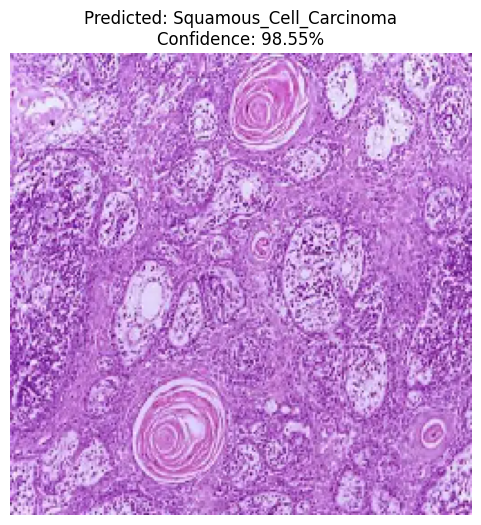

Predicted class: Squamous_Cell_Carcinoma with confidence: 98.55%


In [30]:
height = 256
width = 256
img_path = 'custom_img.jpg'
img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_arrary = np.expand_dims(img_array, axis=0)

# Predict the class and confidence
predicted_class, confidence = predict_single_img(model, img)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
plt.axis('off')
plt.show()
print(f"Predicted class: {predicted_class} with confidence: {confidence}%")